In [62]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [63]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

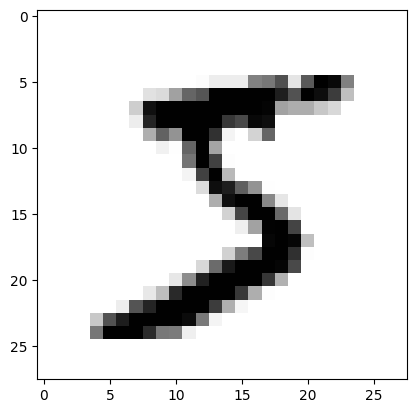

In [64]:
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

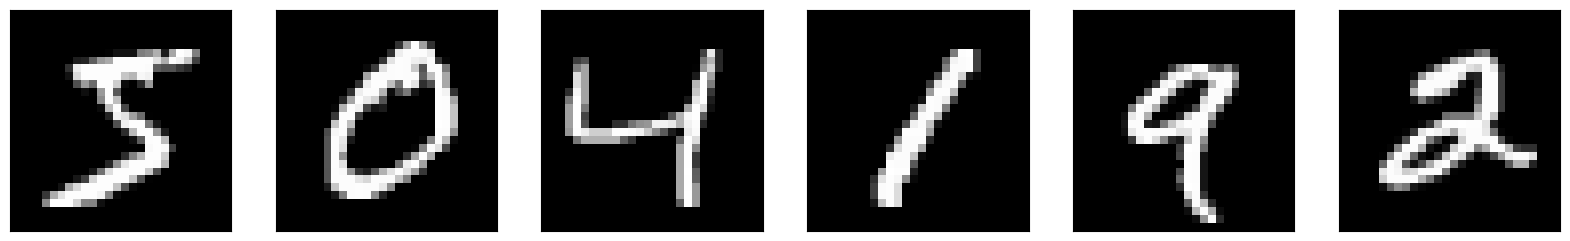

In [65]:
fig=plt.figure(figsize=(20,20))
for i in range(6):
    ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[]);
    ax.imshow(X_train[i],cmap='gray')

<Axes: >

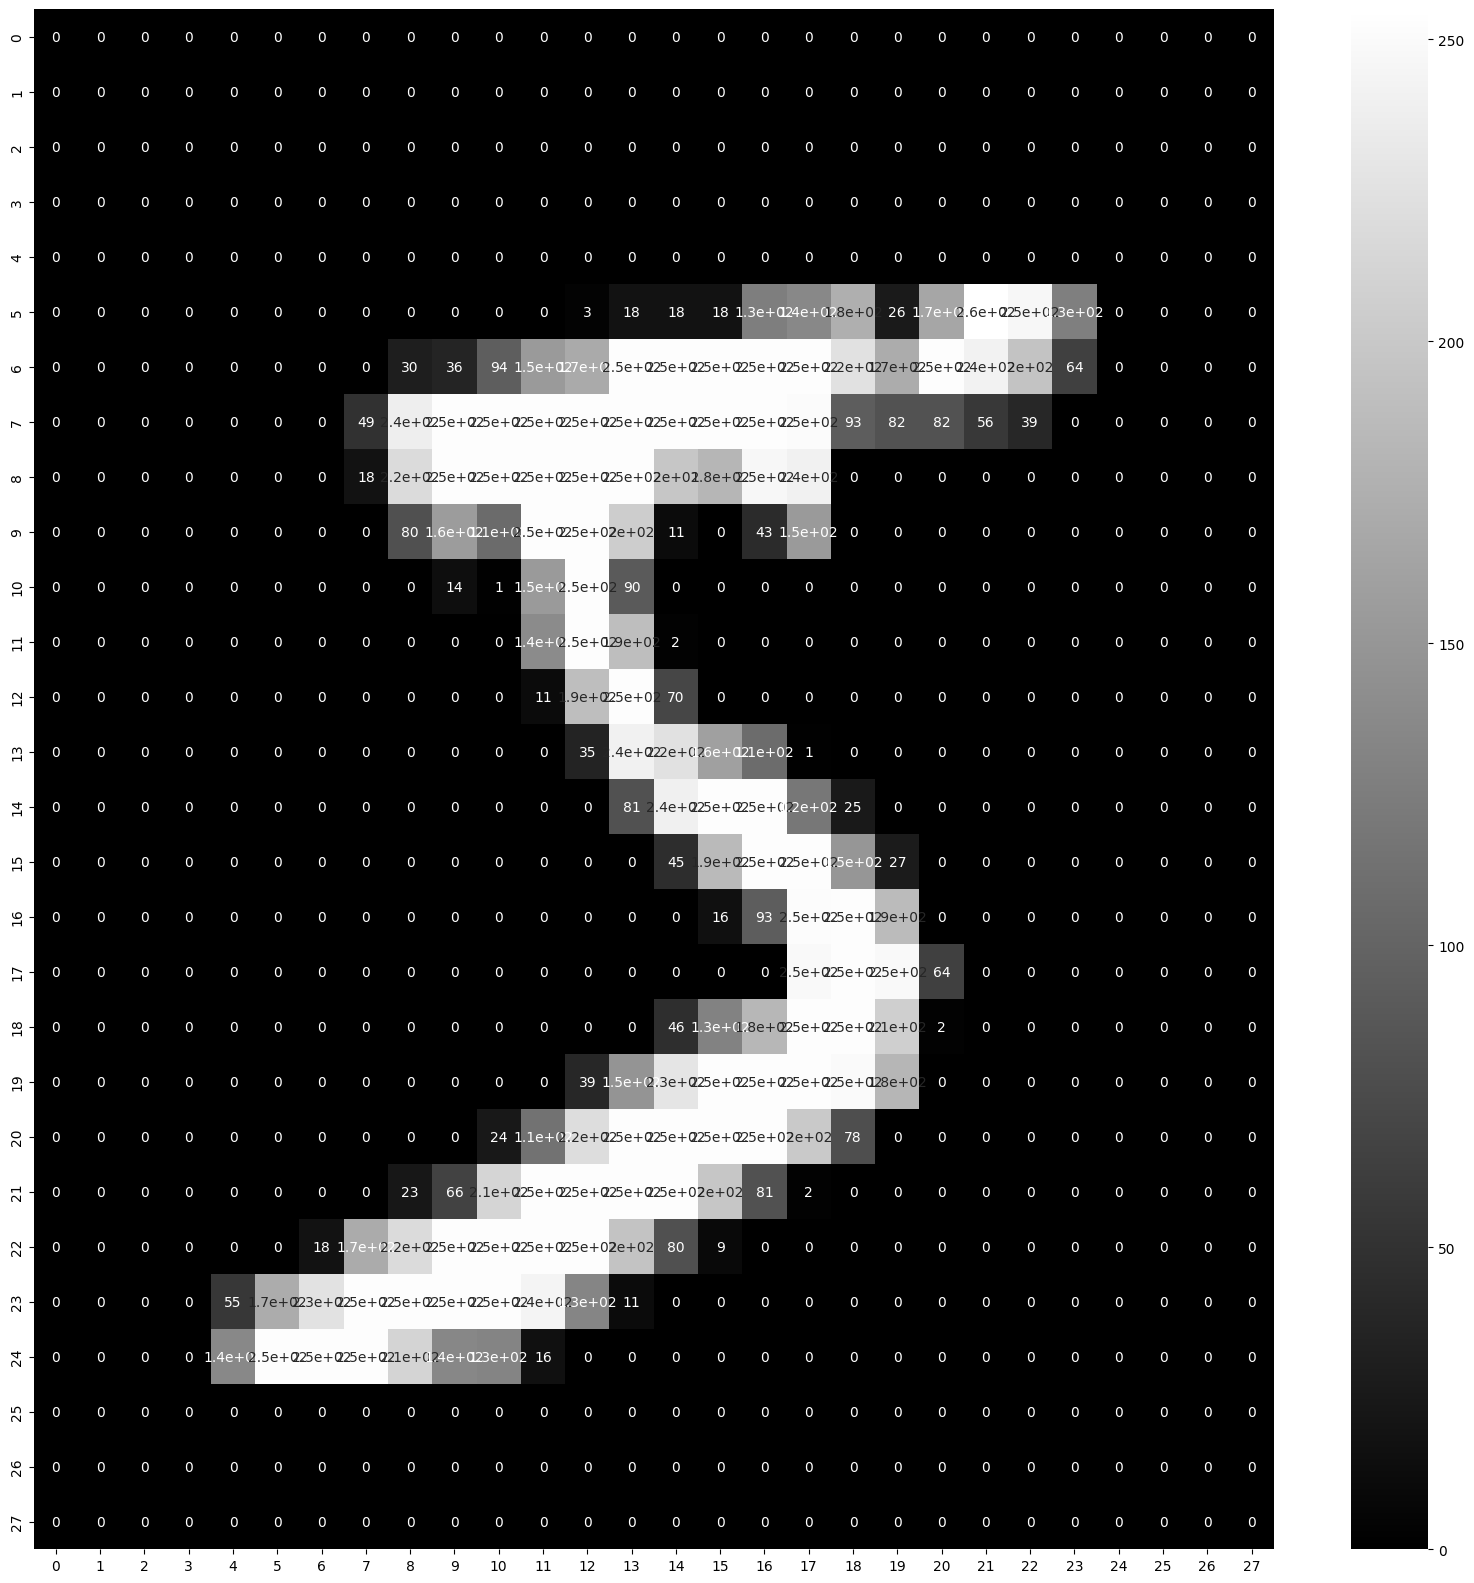

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[0],annot=True,cmap="gray")

In [67]:
#Scaling
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

<Axes: >

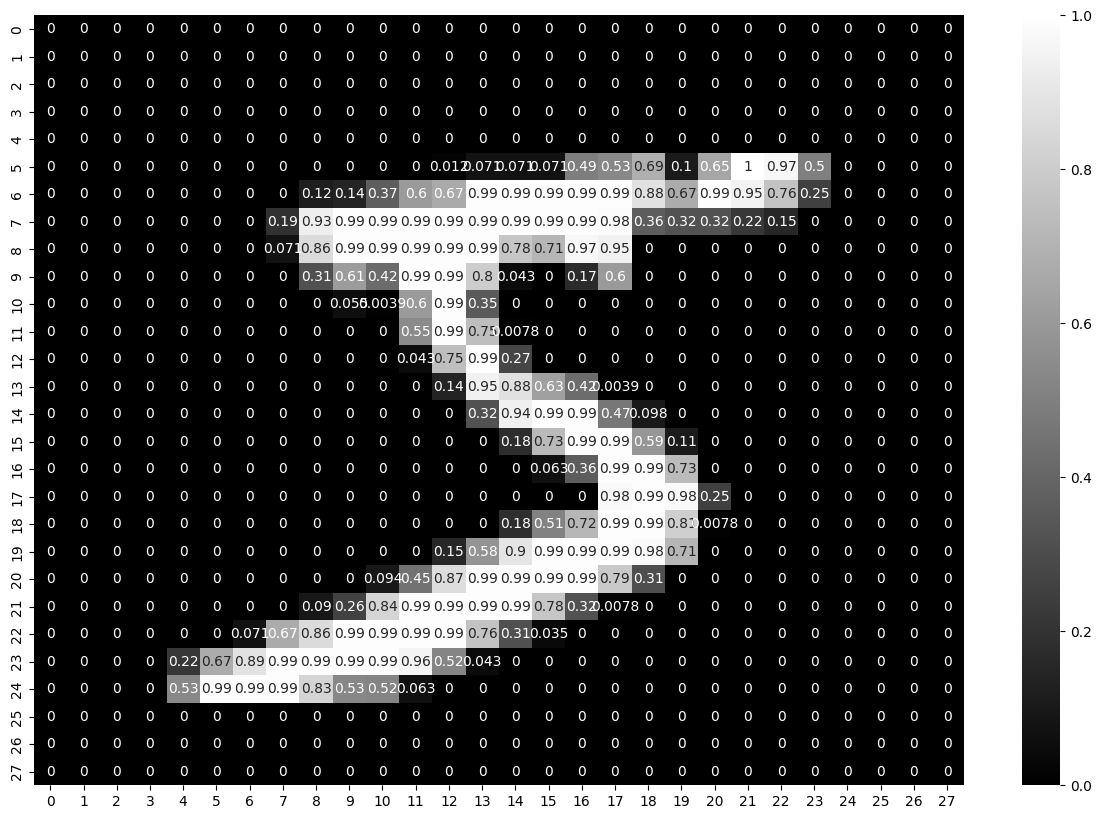

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train[0],annot=True,cmap="gray")

In [69]:
X_train.shape

(60000, 28, 28)

In [70]:
y_train.shape

(60000,)

In [71]:
from tensorflow.keras import utils
utils.to_categorical

<function keras.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [72]:
#ONE HOT ENCODING
num_classes=10
print('Integer-valued labels')
print(y_train[:10])

y_train=utils.to_categorical(y_train,num_classes)
y_test=utils.to_categorical(y_test,num_classes)
print("OHE")
print(y_train[:10])

Integer-valued labels
[5 0 4 1 9 2 1 3 1 4]
OHE
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [73]:
img_rows,img_cols=28,28
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

In [74]:
X_train.shape

(60000, 28, 28, 1)

In [75]:
#CNN Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,GlobalAveragePooling2D

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [76]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [77]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [78]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer=ModelCheckpoint(filepath='model',verbose=1,save_best_only=True)
VALIDATION_SET=(X_test,y_test)
hist=model.fit(X_train,y_train,epochs=10,validation_data=VALIDATION_SET,batch_size=32,validation_split=0.1,callbacks=[checkpointer],verbose=2,
                  shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.04934, saving model to model
1875/1875 - 57s - loss: 0.1336 - accuracy: 0.9590 - val_loss: 0.0493 - val_accuracy: 0.9832 - 57s/epoch - 30ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.04934 to 0.03021, saving model to model
1875/1875 - 48s - loss: 0.0426 - accuracy: 0.9872 - val_loss: 0.0302 - val_accuracy: 0.9892 - 48s/epoch - 25ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 0.03021
1875/1875 - 46s - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0352 - val_accuracy: 0.9886 - 46s/epoch - 25ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.03021
1875/1875 - 46s - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0310 - val_accuracy: 0.9898 - 46s/epoch - 25ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.03021
1875/1875 - 52s - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0398 - val_accuracy: 0.9871 - 52s/epoch - 28ms/step
Epoch 6/10

Epoch 6: val_loss did not improve from 0.03021
1875/1875 - 48s 

In [79]:
import pandas as pd

In [80]:
pd.DataFrame(hist.history)

,loss,accuracy,val_loss,val_accuracy
0,0.133564,0.959017,0.049343,0.9832
1,0.042648,0.987167,0.030212,0.9892
2,0.028918,0.991050,0.035234,0.9886
3,0.022472,0.992483,0.030994,0.9898
4,0.016119,0.994850,0.039781,0.9871
5,0.012425,0.995917,0.032218,0.9908
6,0.009568,0.996850,0.033260,0.9912
7,0.008985,0.996933,0.031667,0.9909
8,0.007326,0.997550,0.039707,0.9895
9,0.006422,0.997600,0.045668,0.9882


<Axes: >

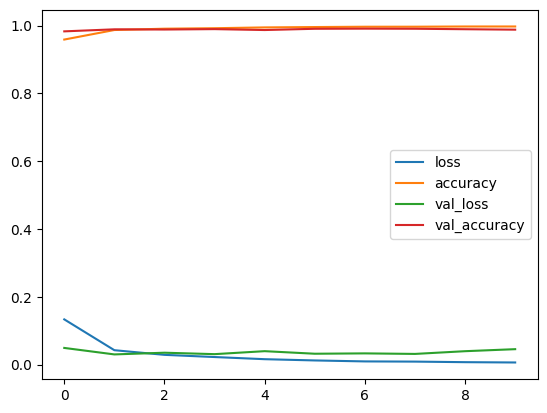

In [81]:
pd.DataFrame(hist.history).plot()

In [82]:
tf.keras.models.save_model(model, "num_model.h5")